In [1]:
import pandas as pd
import numpy as np
import seaborn as sns  
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("C:\\Datasets\\train_stations\\train_stations_europe.csv")

In [3]:
df.head()

,id,name,name_norm,uic,latitude,longitude,parent_station_id,country,time_zone,is_city,is_main_station,is_airport,entur_id,entur_is_enabled
0,1,Château-Arnoux—St-Auban,Chateau-Arnoux-St-Auban,NaN,44.081790,6.001625,NaN,FR,Europe/Paris,True,False,False,NaN,False
1,2,Château-Arnoux—St-Auban,Chateau-Arnoux-St-Auban,8775123.0,44.061565,5.997373,1.0,FR,Europe/Paris,False,True,False,NaN,False
2,3,Château-Arnoux Mairie,Chateau-Arnoux Mairie,8775122.0,44.063863,6.011248,1.0,FR,Europe/Paris,False,False,False,NaN,False
3,4,Digne-les-Bains,Digne-les-Bains,NaN,44.350000,6.350000,NaN,FR,Europe/Paris,True,False,False,NaN,False
4,6,Digne-les-Bains,Digne-les-Bains,8775149.0,44.088710,6.222982,4.0,FR,Europe/Paris,False,True,False,NaN,False


In [4]:
df.isnull().sum()

id                       0
name                     0
name_norm                0
uic                  39855
latitude              1895
longitude             1895
parent_station_id    60016
country                  0
time_zone                0
is_city                  0
is_main_station          0
is_airport               0
entur_id             63395
entur_is_enabled         0
dtype: int64

In [7]:
df.dropna(axis=1,inplace=True)

In [8]:
df.isnull().sum()

id                  0
name                0
name_norm           0
country             0
time_zone           0
is_city             0
is_main_station     0
is_airport          0
entur_is_enabled    0
dtype: int64

In [9]:
df.head()

,id,name,name_norm,country,time_zone,is_city,is_main_station,is_airport,entur_is_enabled
0,1,Château-Arnoux—St-Auban,Chateau-Arnoux-St-Auban,FR,Europe/Paris,True,False,False,False
1,2,Château-Arnoux—St-Auban,Chateau-Arnoux-St-Auban,FR,Europe/Paris,False,True,False,False
2,3,Château-Arnoux Mairie,Chateau-Arnoux Mairie,FR,Europe/Paris,False,False,False,False
3,4,Digne-les-Bains,Digne-les-Bains,FR,Europe/Paris,True,False,False,False
4,6,Digne-les-Bains,Digne-les-Bains,FR,Europe/Paris,False,True,False,False


In [10]:
df.drop(['id'],axis=1,inplace=True)

In [11]:
df.head()

,name,name_norm,country,time_zone,is_city,is_main_station,is_airport,entur_is_enabled
0,Château-Arnoux—St-Auban,Chateau-Arnoux-St-Auban,FR,Europe/Paris,True,False,False,False
1,Château-Arnoux—St-Auban,Chateau-Arnoux-St-Auban,FR,Europe/Paris,False,True,False,False
2,Château-Arnoux Mairie,Chateau-Arnoux Mairie,FR,Europe/Paris,False,False,False,False
3,Digne-les-Bains,Digne-les-Bains,FR,Europe/Paris,True,False,False,False
4,Digne-les-Bains,Digne-les-Bains,FR,Europe/Paris,False,True,False,False


In [14]:
for column in df.columns:
    print(df[column].value_counts().head(10))
    print("=================================")
    print(df[column].nunique())
    print("*********************************")

München Hbf         5
Saverne             5
Frankfurt (Oder)    4
Port-Bou            4
Les Marécottes      4
Luxembourg          4
Chiasso             4
Le Locle            4
Genève              4
Ventimiglia         4
Name: name, dtype: int64
63078
*********************************
Munchen Hbf         5
Saverne             5
Frankfurt (Oder)    4
Port-Bou            4
Luxembourg          4
Chiasso             4
Irun                4
Canfranc            4
Geneve              4
Le Locle            4
Name: name_norm, dtype: int64
63053
*********************************
CH    22347
DE     7896
FR     7402
SE     5767
ES     5027
IT     4912
GB     2790
AT     1710
NO      856
HR      730
Name: country, dtype: int64
43
*********************************
Europe/Zurich       22347
Europe/Berlin        7896
Europe/Paris         7412
Europe/Stockholm     5767
Europe/Madrid        5027
Europe/Rome          4912
Europe/London        2790
Europe/Vienna        1710
Europe/Oslo           856
Europe

In [18]:
# To find the number of datapoints
data_points = len(df)
print(f"The total number of data points are:{data_points}")

The total number of data points are:64030


In [19]:
# Now for the shape of our dataset
df.shape

(64030, 8)

In [20]:
df.columns

Index(['name', 'name_norm', 'country', 'time_zone', 'is_city',
       'is_main_station', 'is_airport', 'entur_is_enabled'],
      dtype='object')

In [24]:
assert df.name.values.any() == df.name_norm.values.any()
# The two columns have some different values

AssertionError: 

In [27]:
def most_appearing(column,df=df):
    print(df[column].value_counts().head(10))

In [28]:
most_appearing('country')

CH    22347
DE     7896
FR     7402
SE     5767
ES     5027
IT     4912
GB     2790
AT     1710
NO      856
HR      730
Name: country, dtype: int64


In [29]:
df.columns

Index(['name', 'name_norm', 'country', 'time_zone', 'is_city',
       'is_main_station', 'is_airport', 'entur_is_enabled'],
      dtype='object')

# CITIES ,MAIN STATIONS AND AIRPORTS

Text(0.5, 1.0, 'As airport and main station ')

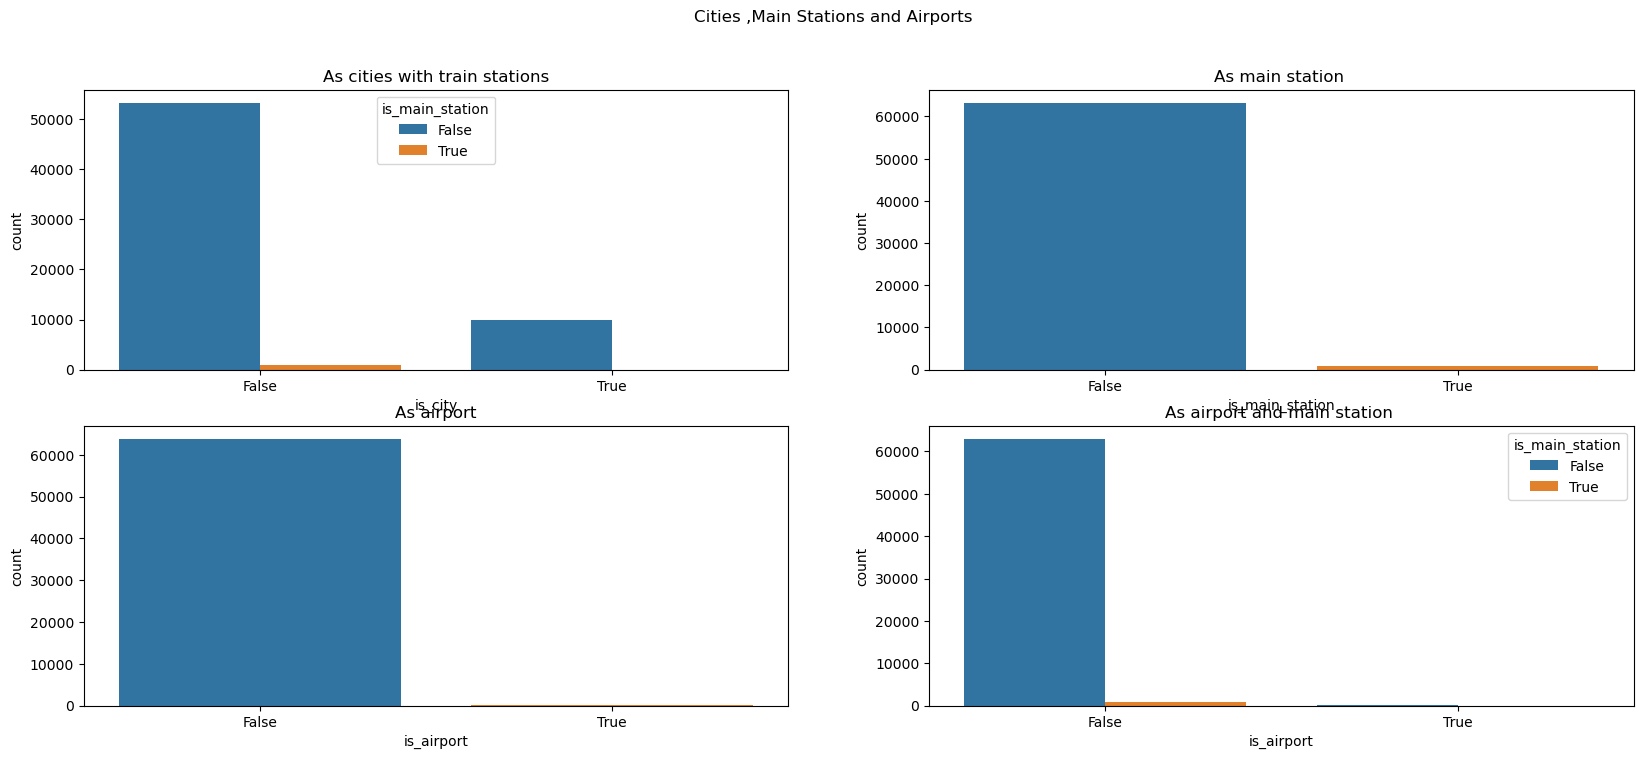

In [40]:
fig = plt.figure(figsize=(20,8))
fig.suptitle('Cities ,Main Stations and Airports')
plt.subplot(2,2,1)
sns.countplot(x='is_city',data=df,hue='is_main_station')
plt.title('As cities with train stations')
plt.subplot(2,2,2)
sns.countplot(x='is_main_station',data=df)
plt.title('As main station ')
plt.subplot(2,2,3)
sns.countplot(x='is_airport',data=df)
plt.title('As airport')
plt.subplot(2,2,4)
sns.countplot(x='is_airport',data=df,hue='is_main_station')
plt.title('As airport and main station ')



<AxesSubplot:xlabel='country', ylabel='count'>

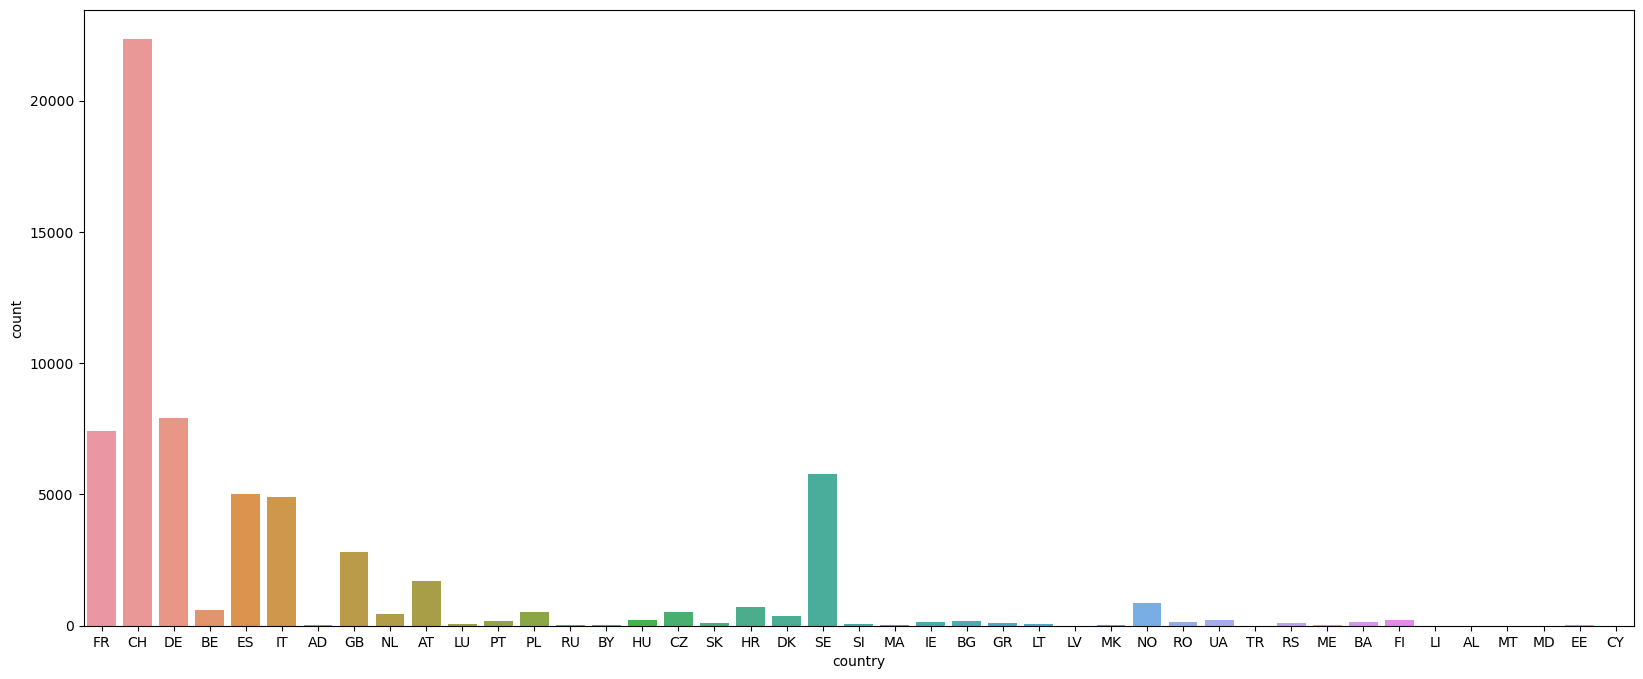

In [43]:
plt.figure(figsize=(20,8))
sns.countplot(x='country',data=df)
plt.title('How cities compare interms of train stations')

Text(0.5, 1.0, 'How cities compare interms of time zones sample of 17%')

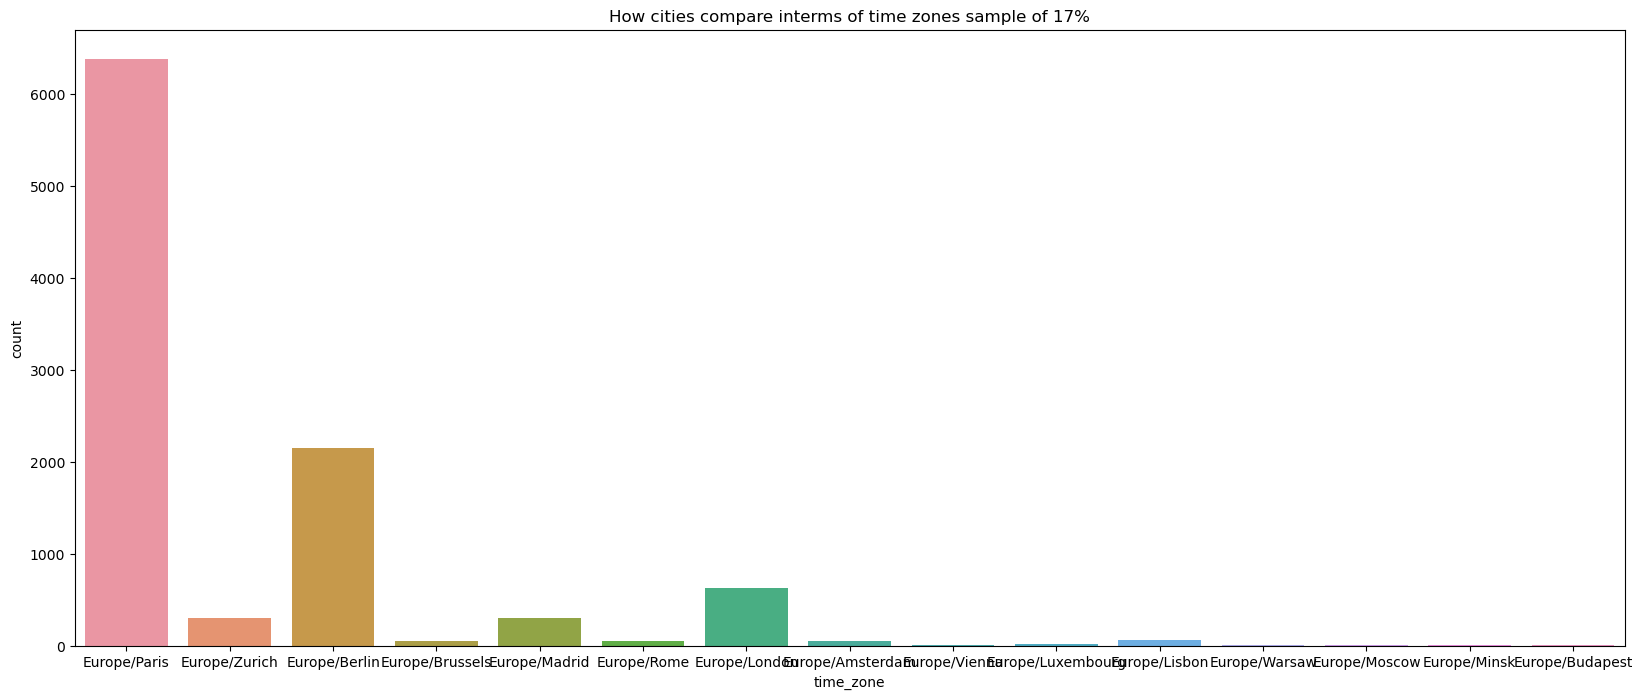

In [54]:
plt.figure(figsize=(20,8))
sns.countplot(data=df.head(10000),x='time_zone')
plt.title('How cities compare interms of time zones sample of 17%')
# Most of the train stations  follow the Europe/Paris Time and Europe/Berlin

In [55]:
df.head()

,name,name_norm,country,time_zone,is_city,is_main_station,is_airport,entur_is_enabled
0,Château-Arnoux—St-Auban,Chateau-Arnoux-St-Auban,FR,Europe/Paris,True,False,False,False
1,Château-Arnoux—St-Auban,Chateau-Arnoux-St-Auban,FR,Europe/Paris,False,True,False,False
2,Château-Arnoux Mairie,Chateau-Arnoux Mairie,FR,Europe/Paris,False,False,False,False
3,Digne-les-Bains,Digne-les-Bains,FR,Europe/Paris,True,False,False,False
4,Digne-les-Bains,Digne-les-Bains,FR,Europe/Paris,False,True,False,False


In [70]:
# How many main stations are in the Europe/Berlin timezone
"""x = df[df['time_zone']=='Europe/Paris']['is_main_station']
x.value_counts().head()
sns.countplot(x)"""

#
def main_station(identifier,timezone,df=df):
    """
    Args: 
    identifier(str)-this can be either the name or timezone
    timezone : any of all the timezones in the dataset ,try df.timezone.value_counts.head
    df : our dataframe
    Returns :
    
    """
    print( f"The total in {identifier }| is {df[df[identifier]==timezone]['is_main_station'].value_counts().head()}")
    plt.figure(figsize=(15,8))
    sns.countplot(x=df[df[identifier]==timezone]['is_main_station'].value_counts().head())
    plt.show()

The total in country| is False    7153
True      249
Name: is_main_station, dtype: int64


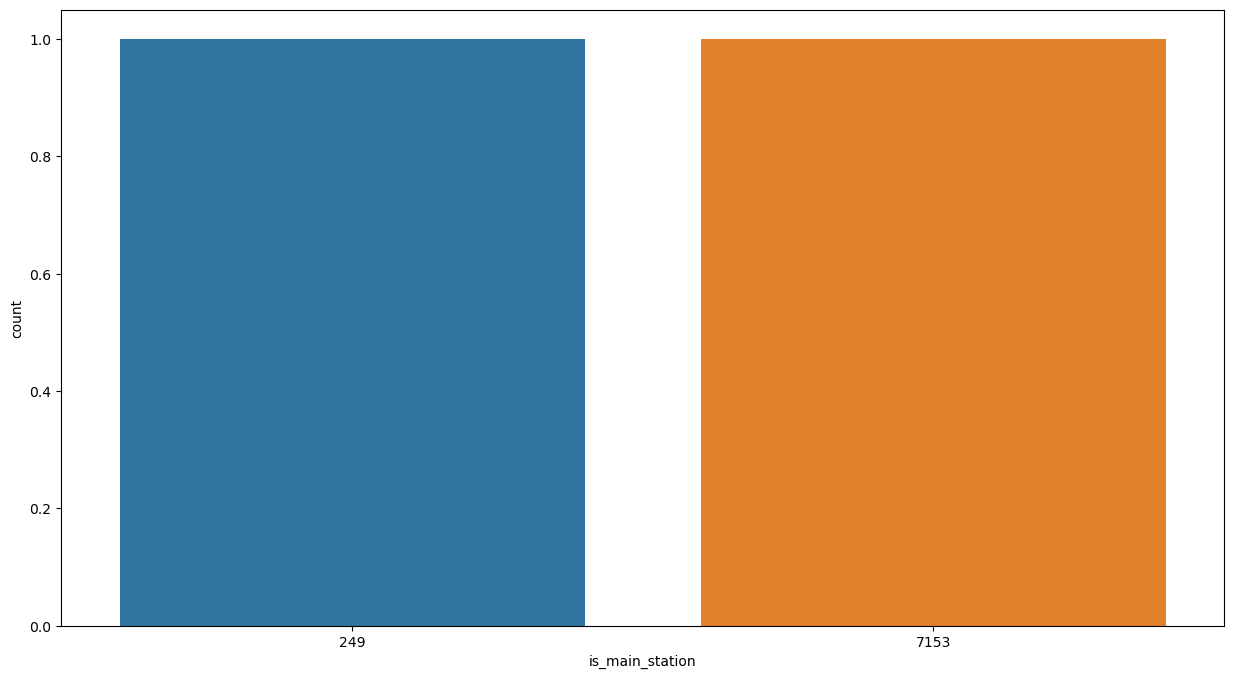

In [71]:
main_station('country','FR')

The total in time_zone| is False    7784
True      112
Name: is_main_station, dtype: int64


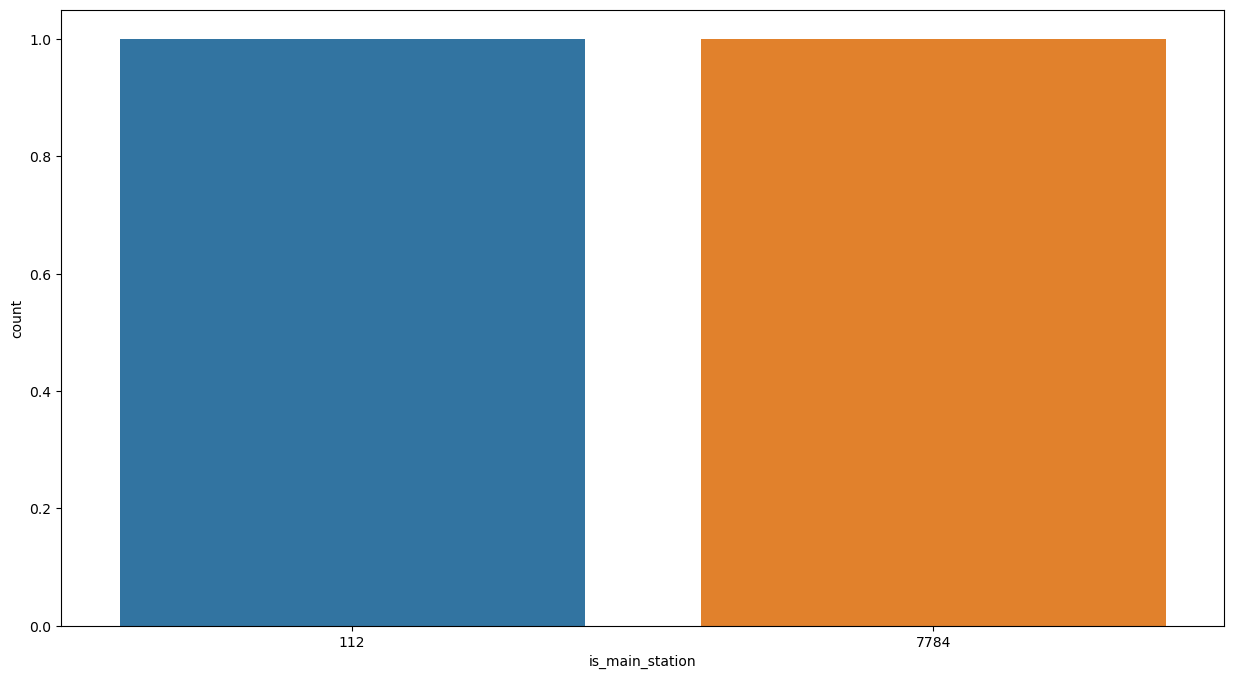

In [72]:
main_station('time_zone','Europe/Berlin')